# AnoGAN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip drive/My\ Drive/data.zip

Archive:  drive/My Drive/data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/img_78/
  inflating: data/img_78/img_7_0.jpg  
  inflating: data/img_78/img_7_1.jpg  
  inflating: data/img_78/img_7_10.jpg  
  inflating: data/img_78/img_7_100.jpg  
  inflating: data/img_78/img_7_101.jpg  
  inflating: data/img_78/img_7_102.jpg  
  inflating: data/img_78/img_7_103.jpg  
  inflating: data/img_78/img_7_104.jpg  
  inflating: data/img_78/img_7_105.jpg  
  inflating: data/img_78/img_7_106.jpg  
  inflating: data/img_78/img_7_107.jpg  
  inflating: data/img_78/img_7_108.jpg  
  inflating: data/img_78/img_7_109.jpg  
  inflating: data/img_78/img_7_11.jpg  
  inflating: data/img_78/img_7_110.jpg  
  inflating: data/img_78/img_7_111.jpg  
  inflating: data/img_78/img_7_112.jpg  
  inflating: data/img_78/img_7_113.jpg  
  inflating: data/img_78/img_7_114.jpg  
  inflating: data/

## DCGAN Class

In [0]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, z_dim=20, image_size=64):
        super(Generator, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(z_dim, image_size * 8,kernel_size=4, stride=1),
            nn.BatchNorm2d(image_size * 8),
            nn.ReLU(inplace=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 8, image_size * 4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size*4),
            nn.ReLU(inplace=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 4, image_size*2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size * 2),
            nn.ReLU(inplace=True)
        )
        
        self.layer4 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 2, image_size, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size),
            nn.ReLU(inplace=True)
        )
        
        self.last = nn.Sequential(
            nn.ConvTranspose2d(image_size, 1, kernel_size=4, stride=2, padding=1), # output channel is 1 because the output is grayscale.
            nn.Tanh()
        )
        
    def forward(self, z):
        out = self.layer1(z)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.last(out)
        
        return out
    
class Discriminator(nn.Module):
    def __init__(self, z_dim=20, image_size=64):
        super(Discriminator, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, image_size, kernel_size=4, stride=2, padding=1), # input channel is 1 because the input is grayscale.
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(image_size, image_size*2, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(image_size*2, image_size*4, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(image_size*4, image_size*8, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.last = nn.Conv2d(image_size*8, 1, kernel_size=4, stride=1)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        feature = out # Spit out the feature in the last layer.
        feature = feature.view(feature.size()[0], -1) # Convert to 2-d
        
        out = self.last(out)
        
        return out, feature

In [0]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, z_dim=20, image_size=64):
        super(Generator, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(z_dim, image_size * 8,kernel_size=4, stride=1),
            nn.BatchNorm2d(image_size * 8),
            nn.ReLU(inplace=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 8, image_size * 4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size*4),
            nn.ReLU(inplace=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 4, image_size*2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size * 2),
            nn.ReLU(inplace=True)
        )
        
        self.layer4 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 2, image_size, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size),
            nn.ReLU(inplace=True)
        )
        
        self.last = nn.Sequential(
            nn.ConvTranspose2d(image_size, 1, kernel_size=4, stride=2, padding=1), # output channel is 1 because the output is grayscale.
            nn.Tanh()
        )
        
    def forward(self, z):
        out = self.layer1(z)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.last(out)
        
        return out
    
class Discriminator(nn.Module):
    def __init__(self, z_dim=20, image_size=64):
        super(Discriminator, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, image_size, kernel_size=4, stride=2, padding=1), # input channel is 1 because the input is grayscale.
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(image_size, image_size*2, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(image_size*2, image_size*4, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(image_size*4, image_size*8, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.last = nn.Conv2d(image_size*8, 1, kernel_size=4, stride=1)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        feature = out # Spit out the feature in the last layer.
        feature = feature.view(feature.size()[0], -1) # Convert to 2-d
        
        out = self.last(out)
        
        return out, feature

## Generative Random Number z

In [0]:
import torch 
z = torch.randn(5, 20)
z = z.view(z.size(0), z.size(1), 1, 1)

z.requires_grad = True
z_optimizer = torch.optim.Adam([z], lr=1e-3)

## Loss

In [0]:
def Anomaly_score(x, fake_img, D, Lambda=0.1):
    
    residual_loss = torch.abs(x-fake_img)
    residual_loss = residual_loss.view(residual_loss.size()[0], -1)
    residual_loss = torch.sum(residual_loss, dim=1)
    
    _, x_feature = D(x)
    _, G_feature = D(fake_img)
    
    discrimination_loss = torch.abs(x_feature-G_feature)
    discrimination_loss = discrimination_loss.view(discrimination_loss.size()[0], -1)
    discrimination_loss = torch.sum(discrimination_loss, dim=1)
    
    loss_each = (1-Lambda)*residual_loss + Lambda*discrimination_loss
    
    total_loss = torch.sum(loss_each)
    
    return total_loss, loss_each, residual_loss 

## DataLoader

In [0]:
from torchvision import transforms
import torch.utils.data as data
from PIL import Image

def make_test_datapath_list():
    train_img_list = list()
    
    for img_idx in range(5):
        img_path = './data/test/img_7_'+str(img_idx)+'.jpg'
        train_img_list.append(img_path)
        
        img_path = './data/test/img_8_'+str(img_idx)+'.jpg'
        train_img_list.append(img_path)
        
        img_path = './data/test/img_2_'+str(img_idx)+'.jpg'
        train_img_list.append(img_path)
        
    return train_img_list

class ImageTransform():
    def __init__(self, mean, std):
        self.data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean,std)
        ])
        
    def __call__(self, img):
        return self.data_transform(img)

class GAN_Img_Dataset(data.Dataset):
    def __init__(self, file_list, transform):
        self.file_list = file_list
        self.transform = transform
        
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, index):
        img_path = self.file_list[index]
        img = Image.open(img_path)
        
        img_transformed = self.transform(img)
        
        return img_transformed

test_img_list = make_test_datapath_list()

mean = (0.5, )
std = (0.5, )
test_dataset = GAN_Img_Dataset(file_list=test_img_list, transform=ImageTransform(mean, std))

batch_size=5
test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True
)

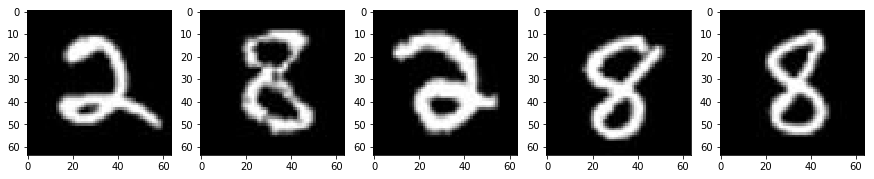

In [0]:
import matplotlib.pyplot as plt

batch_iterator = iter(test_dataloader)
imges = next(batch_iterator)

fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    plt.subplot(2, 5, i+1)
    plt.imshow(imges[i][0], 'gray')

In [0]:
import time

def train_model(G, D, dataloader, num_epochs):
  
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  print('Using device:', device)
  
  g_lr, d_lr = 0.0001, 0.0004
  beta1, beta2 = 0., 0.9
  g_optimizer = torch.optim.Adam(G.parameters(), g_lr, [beta1, beta2])
  d_optimizer = torch.optim.Adam(D.parameters(), d_lr, [beta1, beta2])
  
  criterion = nn.BCEWithLogitsLoss(reduction='mean')
  
  z_dim = 20
  mini_batch_size = 64
  
  G.to(device)
  D.to(device)
  
  G.train()
  D.train()
  
  torch.backends.cudnn.benchmark = True
  
  num_train_imgs = len(dataloader.dataset)
  batch_size = dataloader.batch_size
  
  iteration = 1
  logs = []
  
  for epoch in range(num_epochs):
    t_epoch_start = time.time()
    epoch_g_loss = 0.
    epoch_d_loss = 0.
    
    print('----')
    print('Epoch {}/{}'.format(epoch, num_epochs))
    print('(train)')
    
    for imges in dataloader:
      #--------------------------
      #1. Train Discriminator
      #---------------------------
      if imges.size()[0] == 1:
        continue
      imges = imges.to(device)
      
      mini_batch_size = imges.size()[0]
      label_real = torch.full((mini_batch_size,), 1).to(device)
      label_fake = torch.full((mini_batch_size,), 0).to(device)
      
      d_out_real, _ = D(imges)
      
      input_z = torch.randn(mini_batch_size, z_dim).to(device)
      input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)
      fake_images = G(input_z)
      d_out_fake, _ = D(fake_images)
      
      d_loss_real = criterion(d_out_real.view(-1), label_real)
      d_loss_fake = criterion(d_out_fake.view(-1), label_fake)
      d_loss = d_loss_real + d_loss_fake
      
      g_optimizer.zero_grad()
      d_optimizer.zero_grad()
      
      d_loss.backward()
      d_optimizer.step()
      
      input_z = torch.randn(mini_batch_size, z_dim).to(device)
      input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)
      
      
      #------------------------
      #2. Train Generator
      #------------------------
      input_z = torch.randn(mini_batch_size, z_dim).to(device)
      input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)
      fake_images = G(input_z)
      d_out_fake, _ = D(fake_images)
      
      g_loss = criterion(d_out_fake.view(-1), label_real)
      
      g_optimizer.zero_grad()
      d_optimizer.zero_grad()
      g_loss.backward()
      g_optimizer.step()
      
      #------------------------
      #3. Loss
      #------------------------
      epoch_d_loss += d_loss.item()
      epoch_g_loss += g_loss.item()
      iteration+=1
      
    t_epoch_finish = time.time()
    print('--------------')
    print('epoch {} || Epoch_D_Loss:{:.4f} || Epoch_G_Loss:{:.4f}'.format(
      epoch, epoch_d_loss/batch_size, epoch_g_loss/batch_size
    ))
    print('timer: {:.4f} sec'.format(t_epoch_finish - t_epoch_start))
    t_epoch_start = time.time()
  print(' Total Iteration:', iteration)
  
  return G, D
    

In [0]:
G = Generator(z_dim=20, image_size=64)
D = Discriminator(z_dim=20, image_size=64)

# ネットワークの初期化
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        # Conv2dとConvTranspose2dの初期化
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    elif classname.find('BatchNorm') != -1:
        # BatchNorm2dの初期化
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


# 初期化の実施
G.apply(weights_init)
D.apply(weights_init)

print("ネットワークの初期化完了")

ネットワークの初期化完了


In [0]:
def make_datapath_list():
    """学習、検証の画像データとアノテーションデータへのファイルパスリストを作成する。 """

    train_img_list = list()  # 画像ファイルパスを格納

    for img_idx in range(200):
        img_path = "./data/img_78/img_7_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/img_78/img_8_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

    return train_img_list

# DataLoaderの作成と動作確認

# ファイルリストを作成
train_img_list=make_datapath_list()

# Datasetを作成
mean = (0.5,)
std = (0.5,)
train_dataset = GAN_Img_Dataset(
    file_list=train_img_list, transform=ImageTransform(mean, std))

# DataLoaderを作成
batch_size = 64

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

In [0]:
num_epochs = 300
G_update, D_update = train_model(G, D, 
                                 dataloader = train_dataloader, num_epochs = num_epochs)

Using device: cuda:0
----
Epoch 0/300
(train)
--------------
epoch 0 || Epoch_D_Loss:0.0908 || Epoch_G_Loss:0.1788
timer: 1.6181 sec
----
Epoch 1/300
(train)
--------------
epoch 1 || Epoch_D_Loss:0.0685 || Epoch_G_Loss:0.1746
timer: 1.4708 sec
----
Epoch 2/300
(train)
--------------
epoch 2 || Epoch_D_Loss:0.0053 || Epoch_G_Loss:0.4341
timer: 1.4580 sec
----
Epoch 3/300
(train)
--------------
epoch 3 || Epoch_D_Loss:0.2309 || Epoch_G_Loss:0.5102
timer: 1.4737 sec
----
Epoch 4/300
(train)
--------------
epoch 4 || Epoch_D_Loss:0.0561 || Epoch_G_Loss:0.1406
timer: 1.4609 sec
----
Epoch 5/300
(train)
--------------
epoch 5 || Epoch_D_Loss:0.0129 || Epoch_G_Loss:0.3203
timer: 1.4676 sec
----
Epoch 6/300
(train)
--------------
epoch 6 || Epoch_D_Loss:0.1750 || Epoch_G_Loss:0.3391
timer: 1.4645 sec
----
Epoch 7/300
(train)
--------------
epoch 7 || Epoch_D_Loss:0.0419 || Epoch_G_Loss:0.3006
timer: 1.4612 sec
----
Epoch 8/300
(train)
--------------
epoch 8 || Epoch_D_Loss:0.0048 || Epoch_G_L

In [0]:
device = "cuda:0" if torch.cuda.is_available() else 'cpu'
x = imges[0:5]
x = x.to(device)

# Random number z to generate images
z = torch.randn(5, 20).to(device)
z = z.view(z.size(0), z.size(1), 1, 1)

z.requires_grad = True

z_optimizer = torch.optim.Adam([z], lr=1e-3)

for epoch in range(5000+1):
  fake_img = G_update(z)
  loss, _, _ = Anomaly_score(x, fake_img, D_update, Lambda=0.1)
  
  z_optimizer.zero_grad()
  loss.backward()
  z_optimizer.step()
  
  if epoch % 1000 == 0:
    print('epoch {} || loss_total:{:.0f} '.format(epoch, loss.item()))

epoch 0 || loss_total:7578 
epoch 1000 || loss_total:5387 
epoch 2000 || loss_total:4179 
epoch 3000 || loss_total:3177 
epoch 4000 || loss_total:2832 
epoch 5000 || loss_total:2730 


total loss:  [614. 688. 740. 336. 352.]


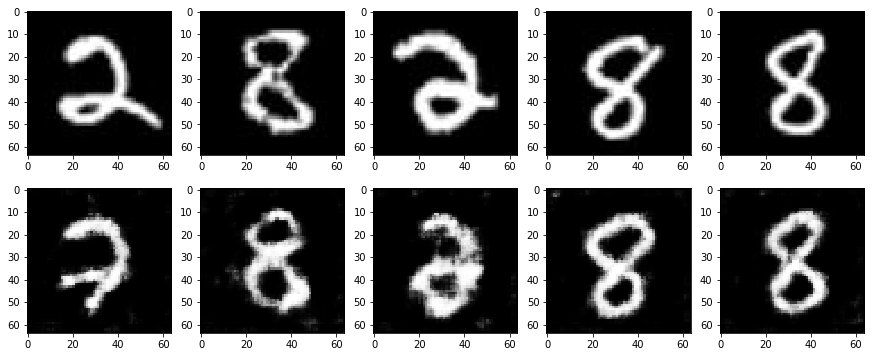

In [0]:
import numpy as np

fake_img = G_update(z)

loss, loss_each, residual_loss_each = Anomaly_score(x, fake_img, D_update, Lambda=0.1)

loss_each = loss_each.cpu().detach().numpy()
print('total loss: ', np.round(loss_each, 0))

fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
  plt.subplot(2, 5, i+1)
  plt.imshow(imges[i][0].cpu().detach().numpy(), 'gray')
  
  plt.subplot(2, 5, 5+i+1)
  plt.imshow(fake_img[i][0].cpu().detach().numpy(), 'gray')

# Efficient GAN

## DataLoader

In [0]:
# パッケージのimport
import random
import math
import time
import pandas as pd
import numpy as np
from PIL import Image

import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms

In [6]:
def make_datapath_list():
    """学習、検証の画像データとアノテーションデータへのファイルパスリストを作成する。 """

    train_img_list = list()  # 画像ファイルパスを格納

    for img_idx in range(200):
        img_path = "./data/img_78_28size/img_7_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/img_78_28size/img_8_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

    return train_img_list

class ImageTransform():
    """画像の前処理クラス"""

    def __init__(self, mean, std):
        self.data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])

    def __call__(self, img):
        return self.data_transform(img)


class GAN_Img_Dataset(data.Dataset):
    """画像のDatasetクラス。PyTorchのDatasetクラスを継承"""

    def __init__(self, file_list, transform):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        '''画像の枚数を返す'''
        return len(self.file_list)

    def __getitem__(self, index):
        '''前処理をした画像のTensor形式のデータを取得'''

        img_path = self.file_list[index]
        img = Image.open(img_path)  # [高さ][幅]白黒

        # 画像の前処理
        img_transformed = self.transform(img)

        return img_transformed

    
# DataLoaderの作成と動作確認

# ファイルリストを作成
train_img_list=make_datapath_list()

# Datasetを作成
mean = (0.5,)
std = (0.5,)
train_dataset = GAN_Img_Dataset(
    file_list=train_img_list, transform=ImageTransform(mean, std))

# DataLoaderを作成
batch_size = 64

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

# 動作の確認
batch_iterator = iter(train_dataloader)  # イテレータに変換
imges = next(batch_iterator)  # 1番目の要素を取り出す
print(imges.size())  # torch.Size([64, 1, 64, 64])

torch.Size([64, 1, 28, 28])


## Generator

In [0]:
import torch.nn as nn

In [0]:
class Generator(nn.Module):
    def __init__(self, z_dim=20):
        super(Generator, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(z_dim, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.Linear(1024, 7*7*128),
            nn.BatchNorm1d(7*7*128),
            nn.ReLU(inplace=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=64, 
                               kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        
        self.last = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=1,
                              kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )
        
    def forward(self,z):
        out = self.layer1(z)
        out = self.layer2(out)
        
        out = out.view(z.shape[0], 128, 7, 7)
        out = self.layer3(out)
        out = self.last(out)
        
        return out
    

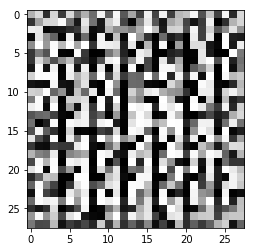

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

G = Generator(z_dim=20)
G.train()

input_z = torch.randn(2, 20)

fake_images = G(input_z)
img_transformed = fake_images[0][0].detach().numpy()
plt.imshow(img_transformed, 'gray')
plt.show()


## Discriminator

In [0]:
class Discriminator(nn.Module):
    def __init__(self, z_dim=20):
        super(Discriminator, self).__init__()
        
        self.x_layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.x_layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.z_layer1 = nn.Linear(z_dim, 512)
        
        self.last1 = nn.Sequential(
            nn.Linear(3648, 1024),
            nn.LeakyReLU(0.1, inplace=True)
        )
        self.last2 = nn.Linear(1024, 1)
        
    def forward(self, x, z):
        x_out = self.x_layer1(x)
        x_out = self.x_layer2(x_out)
        
        z = z.view(z.shape[0], -1)
        z_out = self.z_layer1(z)
        
        x_out = x_out.view(-1, 64 * 7 * 7)
        out = torch.cat([x_out, z_out], dim=1)
        out = self.last1(out)
        
        feature = out
        feature = feature.view(feature.size()[0], -1)
        
        out = self.last2(out)
        
        return out, feature
        

In [11]:
D = Discriminator(z_dim=20)

input_z = torch.randn(2, 20)
fake_images = G(input_z)

d_out, _ = D(fake_images, input_z)

print(nn.Sigmoid()(d_out))

tensor([[0.5371],
        [0.4891]], grad_fn=<SigmoidBackward>)


## Encoder

In [0]:
class Encoder(nn.Module):
    def __init__(self, z_dim=20):
        super(Encoder, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1),
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1, inplace=True)
        )
        
        self.last = nn.Linear(128 * 7 * 7, z_dim)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        
        out = out.view(-1, 128 * 7 * 7)
        out = self.last(out)
        
        return out

In [13]:
E = Encoder(z_dim=20)
x = fake_images
z = E(x)
print(z.shape)

torch.Size([2, 20])


In [0]:
# モデルを学習させる関数を作成


def train_model(G, D, E, dataloader, num_epochs):

    # GPUが使えるかを確認
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("使用デバイス：", device)

    # 最適化手法の設定
    lr_ge = 0.0001
    lr_d = 0.0001/4
    beta1, beta2 = 0.5, 0.999
    g_optimizer = torch.optim.Adam(G.parameters(), lr_ge, [beta1, beta2])
    e_optimizer = torch.optim.Adam(E.parameters(), lr_ge, [beta1, beta2])
    d_optimizer = torch.optim.Adam(D.parameters(), lr_d, [beta1, beta2])

    # 誤差関数を定義
    # BCEWithLogitsLossは入力にシグモイド（logit）をかけてから、
    # バイナリークロスエントロピーを計算
    criterion = nn.BCEWithLogitsLoss(reduction='mean')

    # パラメータをハードコーディング
    z_dim = 20
    mini_batch_size = 64

    # ネットワークをGPUへ
    G.to(device)
    E.to(device)
    D.to(device)

    G.train()  # モデルを訓練モードに
    E.train()  # モデルを訓練モードに
    D.train()  # モデルを訓練モードに

    # ネットワークがある程度固定であれば、高速化させる
    torch.backends.cudnn.benchmark = True

    # 画像の枚数
    num_train_imgs = len(dataloader.dataset)
    batch_size = dataloader.batch_size

    # イテレーションカウンタをセット
    iteration = 1
    logs = []

    # epochのループ
    for epoch in range(num_epochs):

        # 開始時刻を保存
        t_epoch_start = time.time()
        epoch_g_loss = 0.0  # epochの損失和
        epoch_e_loss = 0.0  # epochの損失和
        epoch_d_loss = 0.0  # epochの損失和

        print('-------------')
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-------------')
        print('（train）')

        # データローダーからminibatchずつ取り出すループ
        for imges in dataloader:

            # ミニバッチがサイズが1だと、バッチノーマライゼーションでエラーになるのでさける
            if imges.size()[0] == 1:
                continue

            # ミニバッチサイズの1もしくは0のラベル役のテンソルを作成
            # 正解ラベルと偽ラベルを作成
            # epochの最後のイテレーションはミニバッチの数が少なくなる
            mini_batch_size = imges.size()[0]
            label_real = torch.full((mini_batch_size,), 1).to(device)
            label_fake = torch.full((mini_batch_size,), 0).to(device)

            # GPUが使えるならGPUにデータを送る
            imges = imges.to(device)

            # --------------------
            # 1. Discriminatorの学習
            # --------------------
            # 真の画像を判定　
            z_out_real = E(imges)
            d_out_real, _ = D(imges, z_out_real)

            # 偽の画像を生成して判定
            input_z = torch.randn(mini_batch_size, z_dim).to(device)
            fake_images = G(input_z)
            d_out_fake, _ = D(fake_images, input_z)

            # 誤差を計算
            d_loss_real = criterion(d_out_real.view(-1), label_real)
            d_loss_fake = criterion(d_out_fake.view(-1), label_fake)
            d_loss = d_loss_real + d_loss_fake

            # バックプロパゲーション
            d_optimizer.zero_grad()
            d_loss.backward()
            d_optimizer.step()

            # --------------------
            # 2. Generatorの学習
            # --------------------
            # 偽の画像を生成して判定
            input_z = torch.randn(mini_batch_size, z_dim).to(device)
            fake_images = G(input_z)
            d_out_fake, _ = D(fake_images, input_z)

            # 誤差を計算
            g_loss = criterion(d_out_fake.view(-1), label_real)

            # バックプロパゲーション
            g_optimizer.zero_grad()
            g_loss.backward()
            g_optimizer.step()

            # --------------------
            # 3. Encoderの学習
            # --------------------
            # 真の画像のzを推定
            z_out_real = E(imges)
            d_out_real, _ = D(imges, z_out_real)

            # 誤差を計算
            e_loss = criterion(d_out_real.view(-1), label_fake)

            # バックプロパゲーション
            e_optimizer.zero_grad()
            e_loss.backward()
            e_optimizer.step()

            # --------------------
            # 4. 記録
            # --------------------
            epoch_d_loss += d_loss.item()
            epoch_g_loss += g_loss.item()
            epoch_e_loss += e_loss.item()
            iteration += 1

        # epochのphaseごとのlossと正解率
        t_epoch_finish = time.time()
        print('-------------')
        print('epoch {} || Epoch_D_Loss:{:.4f} ||Epoch_G_Loss:{:.4f} ||Epoch_E_Loss:{:.4f}'.format(
            epoch, epoch_d_loss/batch_size, epoch_g_loss/batch_size, epoch_e_loss/batch_size))
        print('timer:  {:.4f} sec.'.format(t_epoch_finish - t_epoch_start))
        t_epoch_start = time.time()

    print("総イテレーション回数:", iteration)

    return G, D, E


In [15]:
# ネットワークの初期化
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        # conv2dとConvTranspose2dの初期化
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    elif classname.find('BatchNorm') != -1:
        # BatchNorm2dの初期化
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    elif classname.find('Linear') != -1:
        # 全結合層Linearの初期化
        m.bias.data.fill_(0)


# 初期化の実施
G.apply(weights_init)
E.apply(weights_init)
D.apply(weights_init)

print("ネットワークの初期化完了")


ネットワークの初期化完了


In [16]:
# 学習・検証を実行する
# 15分ほどかかる
num_epochs = 1500
G_update, D_update, E_update = train_model(
    G, D, E, dataloader=train_dataloader, num_epochs=num_epochs)


使用デバイス： cuda:0
-------------
Epoch 0/1500
-------------
（train）
-------------
epoch 0 || Epoch_D_Loss:0.1496 ||Epoch_G_Loss:0.0776 ||Epoch_E_Loss:0.0768
timer:  0.9627 sec.
-------------
Epoch 1/1500
-------------
（train）
-------------
epoch 1 || Epoch_D_Loss:0.1459 ||Epoch_G_Loss:0.0798 ||Epoch_E_Loss:0.0784
timer:  0.4445 sec.
-------------
Epoch 2/1500
-------------
（train）
-------------
epoch 2 || Epoch_D_Loss:0.1418 ||Epoch_G_Loss:0.0817 ||Epoch_E_Loss:0.0808
timer:  0.4394 sec.
-------------
Epoch 3/1500
-------------
（train）
-------------
epoch 3 || Epoch_D_Loss:0.1378 ||Epoch_G_Loss:0.0832 ||Epoch_E_Loss:0.0837
timer:  0.4474 sec.
-------------
Epoch 4/1500
-------------
（train）
-------------
epoch 4 || Epoch_D_Loss:0.1347 ||Epoch_G_Loss:0.0858 ||Epoch_E_Loss:0.0856
timer:  0.4467 sec.
-------------
Epoch 5/1500
-------------
（train）
-------------
epoch 5 || Epoch_D_Loss:0.1319 ||Epoch_G_Loss:0.0865 ||Epoch_E_Loss:0.0880
timer:  0.4369 sec.
-------------
Epoch 6/1500
----------

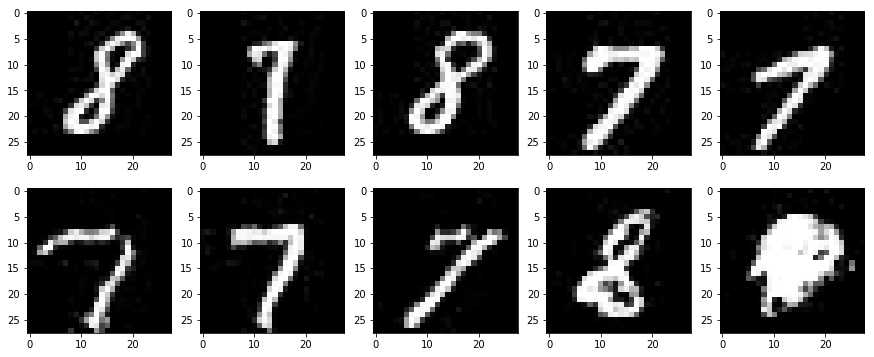

In [17]:
# 生成画像と訓練データを可視化する
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 入力の乱数生成
batch_size = 8
z_dim = 20
fixed_z = torch.randn(batch_size, z_dim)
fake_images = G_update(fixed_z.to(device))

# 訓練データ
batch_iterator = iter(train_dataloader)  # イテレータに変換
imges = next(batch_iterator)  # 1番目の要素を取り出す


# 出力
fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    # 上段に訓練データを
    plt.subplot(2, 5, i+1)
    plt.imshow(imges[i][0].cpu().detach().numpy(), 'gray')

    # 下段に生成データを表示する
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(fake_images[i][0].cpu().detach().numpy(), 'gray')


import torch.nn as nn
import torch

criterion = nn.BCEWithLogitsLoss(reduction='mean')

for imges in dataloader:
    label_real = torch.full((mini_batch_size, ), 1)
    label_fake = torch.full((mini_batch_size, ), 0)
    
    #------------------
    # 1. Discriminator
    #------------------
    
    z_out_real = E(imges)
    d_out_real, _  = D(imges, z_out_real)
    
    input_z = torch.randn(mini_batch_size, z_dim).to(device)
    fake_images = G(input_z)
    d_out_fake, _ = D(fake_images, input_z)
    
    d_loss_real = criterion(d_out_real.view(-1), label_real)
    d_loss_fake = criterion(d_out_fake.view(-1), label_fake)
    d_loss = d_loss_real + d_loss_fake
    
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()
    
    #-------------
    # 2. Generator
    #-------------
    
    input_z = torch.randn(mini_batch_size, z_dim).to(device)
    fake_images = G(input_z)
    d_out_fake, _ = D(fake_images, input_z)
    
    g_loss = criterion(d_out_fake.view(-1), label_real)
    
    g_optimization.zero_grad()
    g_loss.backward()
    g_optimization.step()
    
    #--------------
    # 3. Encoder
    #--------------
    
    z_out_real = E(imgs)
    d_out_real, _ = D(imges, z_out_real)
    
    e_loss = criterion(d_out_real.view(-1), label_fake)
    
    e_optimizer.zero_grad()
    e_loss.backward()
    e_optimizer.step()